![Alt text](./kaggle.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style("darkgrid")

In [145]:
df = pd.read_csv('train.csv', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217
999,0.228994,-0.085453,0.876582,1.057401,-1.404015,-1.091965,0.639176,0.701332,-0.906577,-0.390940,...,0.471415,1.024757,-1.796571,0.603161,0.862705,0.747234,3.275681,0.400372,-3.431031,2.370080


In [147]:
y = pd.read_csv('trainLabels.csv', header=None)
y.tail()

,0
995,0
996,1
997,1
998,0
999,0


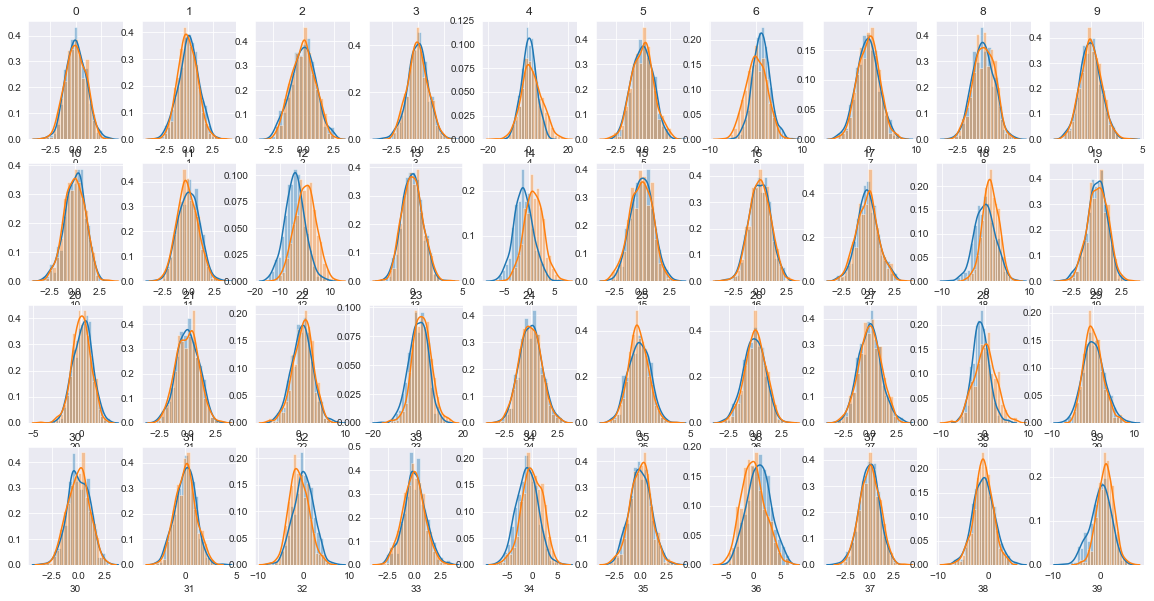

In [148]:
fig, ax = plt.subplots(4, 10, figsize=(20, 10))
for i in range(40):
    ax[int(i/10), i%10].set_title("{}".format(i))
    sns.distplot(df[df.columns[i]][np.where(y == 0)[0]], ax=ax[int(i/10), i%10])
    sns.distplot(df[df.columns[i]][np.where(y == 1)[0]], ax=ax[int(i/10), i%10])
plt.show()

In [149]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

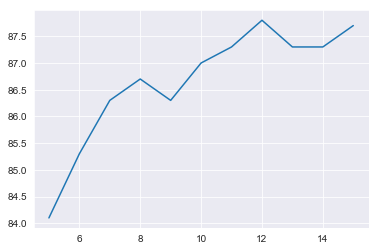

In [150]:
depth = np.linspace(5, 15, 11)
acc = []
for d in depth:
    rf =RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=d, random_state=123)
    scores = cross_val_score(rf, df, y, cv=10, scoring='accuracy', n_jobs=-1)
    acc.append(scores.mean()*100)
sns.lineplot(depth, acc)
plt.show()

In [162]:
test = pd.read_csv('test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [169]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=12, random_state=123)
clf.fit(df, y.values.ravel())
pred = clf.predict(test)
ans = pd.DataFrame(data=pred, columns=['Solution'])
ans['Id'] = np.arange(1,ans.shape[0]+1)
ans = ans[['Id', 'Solution']]
ans

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [170]:
ans.to_csv('test_label.csv', index=False)

In [156]:
feature_select = Lasso(alpha=0.1)
feature_select.fit(df, y)
feature_select.coef_

array([-0.        , -0.        , -0.        ,  0.        ,  0.01607939,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.03707218,  0.        ,  0.048628  ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00835577, -0.        ,  0.00142643,
        0.        , -0.0123838 ,  0.        , -0.        ,  0.03367074])

In [157]:
X = df[df.columns[feature_select.coef_ != 0]]

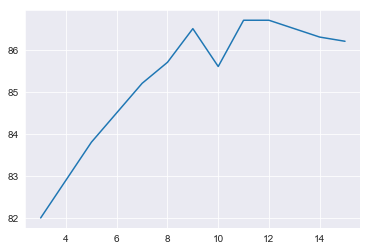

In [159]:
depth = np.linspace(3, 15, 13)
acc = []
for d in depth:
    rf =RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=d, random_state=123)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    acc.append(scores.mean()*100)
sns.lineplot(depth, acc)
plt.show()